# Bank Marketing Project

Introduction:
    
    The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.


# Importing the required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [3]:
import pandas as pd
df=pd.read_csv('Bank Marketing Project.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [5]:
df.shape

(11162, 17)

# Getting the basic outlook over dataset

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [7]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.0+ MB


Observations:
    
    1.Most of the data types are of categorical type and remainng are int type.
    2.There are no null values.

In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Observations:
    
    1.There arent any null values.

# Exploratory Data Analysis

# Univariate Analysis

**Column 1: age**

In [10]:
df.age.describe()

count    11162.000000
mean        41.231948
std         11.913369
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Density'>

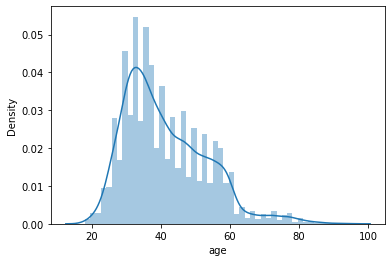

In [11]:
sns.distplot(df.age)

Observations:
    
    1.The majority of age group ranges from 20 to 60.

<AxesSubplot:xlabel='age'>

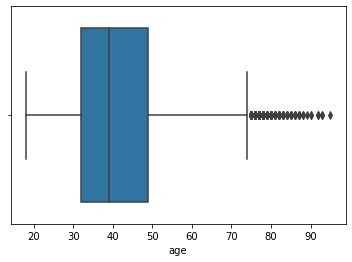

In [12]:
sns.boxplot(df.age)

Observations:
    
    1.There are outliers.

**Column 2: job**

In [13]:
df.job.describe()

count          11162
unique            12
top       management
freq            2566
Name: job, dtype: object

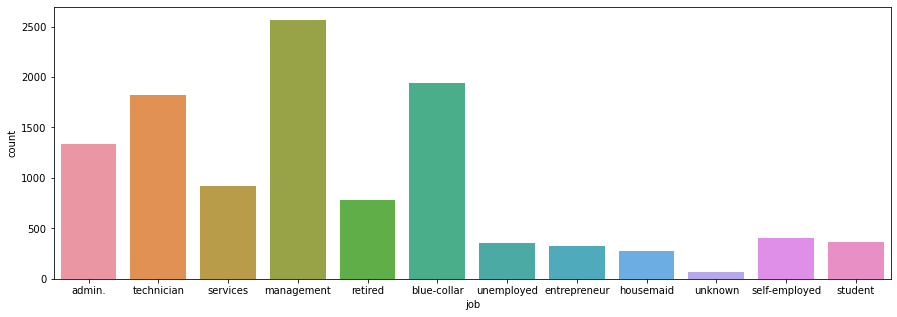

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(df.job)
plt.show()

Observations:
    
    1.Most of the clients are doing the job in Management followed by blue collar and technician.
    2.There are 12 unique jobs listed here.

In [15]:
df.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

Observations:
    
    1.There are unknown jobs, lets make separate dataframe by removing that and lets test that also while preparing the model.

In [16]:
df[df['job'] == 'unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
66,49,unknown,married,primary,no,341,yes,yes,unknown,15,may,520,2,-1,0,unknown,yes
668,52,unknown,married,unknown,no,5361,no,no,cellular,5,aug,607,3,-1,0,unknown,yes
861,60,unknown,married,unknown,no,17297,no,no,cellular,26,aug,664,11,-1,0,unknown,yes
1075,31,unknown,married,secondary,no,111,no,no,cellular,21,nov,504,2,93,2,failure,yes
1091,34,unknown,single,secondary,no,859,no,no,cellular,28,jan,829,1,-1,0,unknown,yes
1092,28,unknown,single,secondary,no,4465,no,no,cellular,28,jan,769,1,-1,0,unknown,yes
1309,37,unknown,single,tertiary,no,0,no,no,cellular,3,mar,426,1,-1,0,unknown,yes
1401,58,unknown,married,unknown,no,68,no,no,cellular,2,apr,268,1,-1,0,unknown,yes
1548,50,unknown,married,primary,no,341,yes,yes,cellular,20,apr,670,4,340,2,success,yes
1592,45,unknown,divorced,unknown,no,0,no,no,cellular,21,apr,278,3,-1,0,unknown,yes


In [17]:
df_filtered1=df.drop(df[df['job']=='unknown'].index)

In [18]:
df_filtered1.shape

(11092, 17)

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
#label encoding the categorical values and saving it in a dictionary.
import time
le.fit(df['job'])
label_job=dict(zip(range(len(le.classes_)),le.classes_))
time.sleep(2)
df['job']=le.fit_transform(df['job'])

**Column 3: marital**

In [21]:
df.marital.value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

<AxesSubplot:xlabel='marital', ylabel='count'>

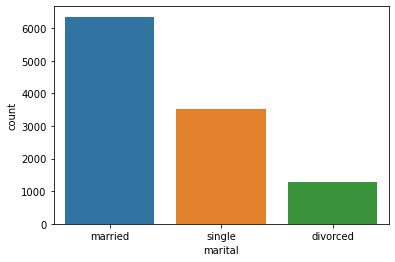

In [22]:
sns.countplot(df['marital'])

Observations:
    
    1.Most of the clients are married followed by singles and divorced.

In [23]:
#label encoding
le.fit(df['marital'])
label_marital=dict(zip(range(len(le.classes_)),le.classes_))
time.sleep(2)
df['marital']=le.fit_transform(df['marital'])

**Column 4: education**

In [24]:
df['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

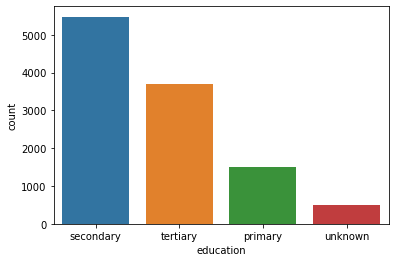

In [25]:
sns.countplot(df['education'])

Observations:
    
    1.Secondary education category where more number of clients belongs followed by tertiary and primary.

In [26]:
#label encoding
le.fit(df.education)
label_education=dict(zip(range(len(le.classes_)),le.classes_))
time.sleep(2)
df.education=le.fit_transform(df.education)

**Column 5: default**

In [27]:
df.default.value_counts()

no     10994
yes      168
Name: default, dtype: int64

<AxesSubplot:xlabel='default', ylabel='count'>

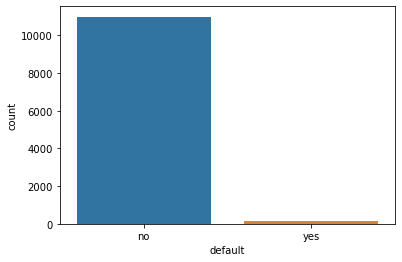

In [28]:
sns.countplot(df.default)

Observations:
    
    1.From the above comparision we can see that there aren't significant yes compared to No

In [29]:
#lebel encoding
le.fit(df.default)
label_default=dict(zip(range(len(le.classes_)),le.classes_))
time.sleep(2)
df.default=le.fit_transform(df.default)

**Column 6: balance**

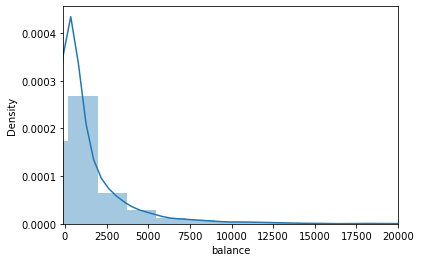

In [30]:
plt.plot()
sns.distplot(df.balance)
plt.xlim(-100,20000)
plt.show()

Observations:
    
    1.We can see that most of the client have a balance ranging from 0 to 7500

<AxesSubplot:xlabel='balance'>

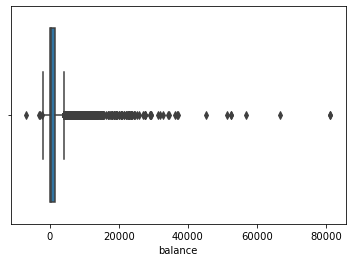

In [31]:
sns.boxplot(df.balance)

Observations:
    
    1.There are outliers

**Column 7: housing**

In [32]:
df.housing.value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

<AxesSubplot:xlabel='housing', ylabel='count'>

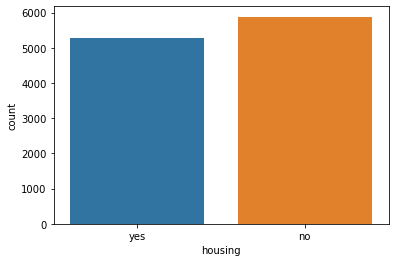

In [33]:
sns.countplot(df.housing)

Observations:
    
    1.In a small difference the category of clients belonging to having house loan fall short from category not having an house loan.

In [34]:
#label encoding
df.housing=le.fit_transform(df.housing)

**Column 8: contact**

In [35]:
df.contact.value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

<AxesSubplot:xlabel='contact', ylabel='count'>

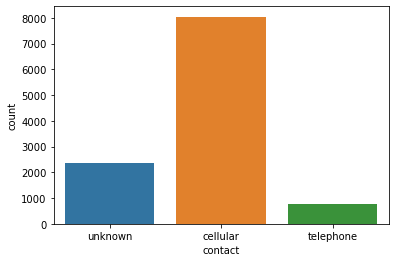

In [36]:
sns.countplot(df.contact)

Observations:
    
    1.Majority of the contact are through cellular.

In [37]:
#label encoding
le.fit(df.contact)
label_contact=dict(zip(range(len(le.classes_)),le.classes_))
time.sleep(2)
df.contact=le.fit_transform(df.contact)

**Column 9:loan**

In [38]:
df.loan.value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

<AxesSubplot:xlabel='loan', ylabel='count'>

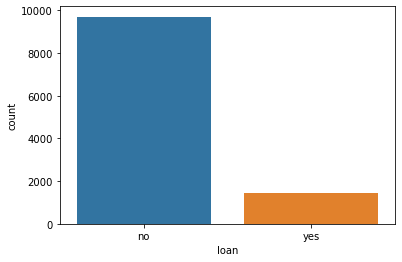

In [39]:
sns.countplot(df.loan)

Observations:
    
    1.From the above the comparision we can say that most of the people dont have an personal loan.

In [40]:
#label encoding
le.fit(df.loan)
label_loan=dict(zip(range(len(le.classes_)),le.classes_))
time.sleep(2)
df.loan=le.fit_transform(df.loan)

**Column 10: day**

<AxesSubplot:xlabel='day', ylabel='Density'>

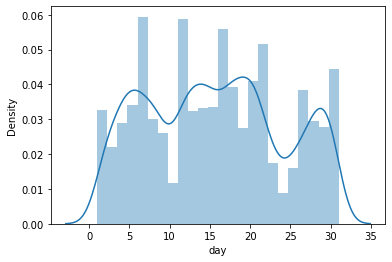

In [41]:
sns.distplot(df.day)

Observations:
    
    1.We can clearly see that at the end of the months(mostly after 25th) the data falls a little.

<AxesSubplot:xlabel='day'>

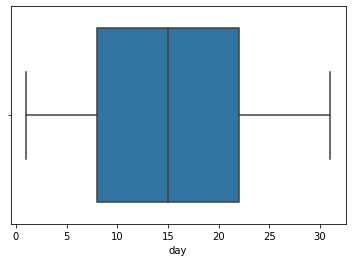

In [42]:
sns.boxplot(df.day)

Observations:
    
    1.The data is clear.

**Column 11:month**

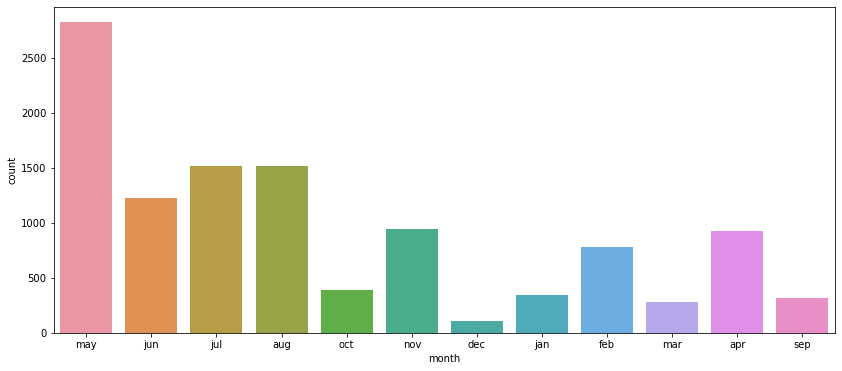

In [43]:
plt.figure(figsize=(14,6))
sns.countplot(df.month)
plt.show()

Observations:
    
    1.The company used to make contact mostly in may followed by July and Augaust.

In [44]:
#label encoding
le.fit(df.month)
label_month=dict(zip(range(len(le.classes_)),le.classes_))
time.sleep(2)
df.month=le.fit_transform(df.month)

**Column 12: duration**

<AxesSubplot:xlabel='duration', ylabel='Density'>

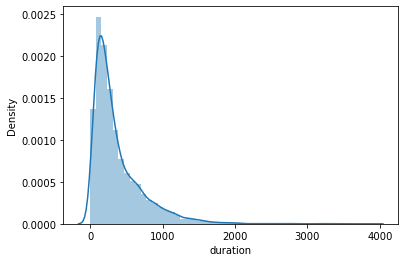

In [45]:
sns.distplot(df.duration)

Observations:
    
    1.We can see that the majority of the duration ranges from 0 to 1000.

<AxesSubplot:xlabel='duration'>

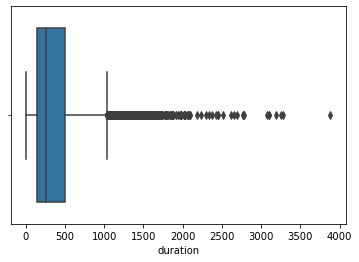

In [46]:
sns.boxplot(df.duration)

Observations:
    
    1.There are outliers.

**Column 13: campaign**

<AxesSubplot:xlabel='campaign', ylabel='Density'>

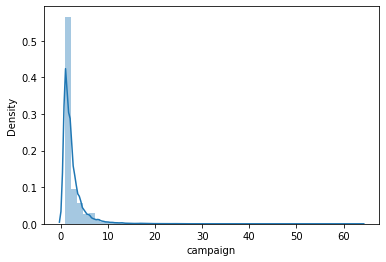

In [47]:
sns.distplot(df.campaign)

Observations:
    
    1.Most of the data lies in the range of 0 to 10.

<AxesSubplot:xlabel='campaign'>

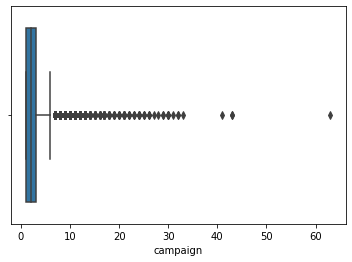

In [48]:
sns.boxplot(df.campaign)

Observations:
    
    1.There are outliers.

**Column 14: pdays**

<AxesSubplot:xlabel='pdays', ylabel='Density'>

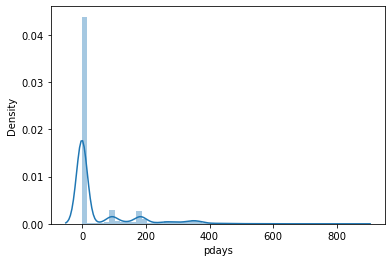

In [49]:
sns.distplot(df.pdays)

Observations:
    
    1.We can see that the pdays range significantly from 0 to 200.

<AxesSubplot:xlabel='pdays'>

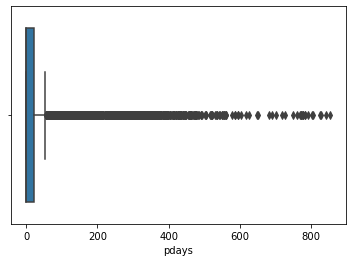

In [50]:
sns.boxplot(df.pdays)

Observations:
    
    1.We can see that there are significant number of outliers.

**Column 15: previous**

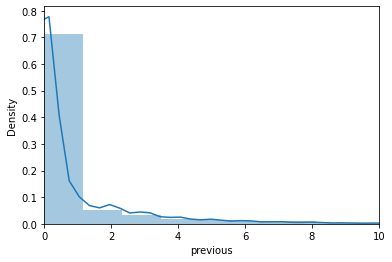

In [51]:
plt.plot()
sns.distplot(df.previous)
plt.xlim(0,10)
plt.show()

Observations:
    
    1.Majority of the number falls to 0 implying that number of contact performed before campaigning is 0.

<AxesSubplot:xlabel='previous'>

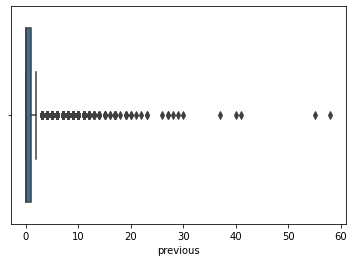

In [52]:
sns.boxplot(df.previous)

Observations:
    
    1.There are enough outliers.

**Coulumn 16: poutcome**

In [53]:
df.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

<AxesSubplot:xlabel='poutcome', ylabel='count'>

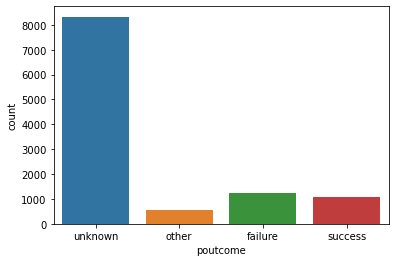

In [54]:
sns.countplot(df.poutcome)

Observations:
    
    1.we can see that unknown accupies the majority of the clients and success and failures are almost same.

In [55]:
#label encoding
le.fit(df.poutcome)
label_poutcome=dict(zip(range(len(le.classes_)),le.classes_))
time.sleep(2)
df.poutcome=le.fit_transform(df.poutcome)

**Column 17: deposit**

<AxesSubplot:xlabel='deposit', ylabel='count'>

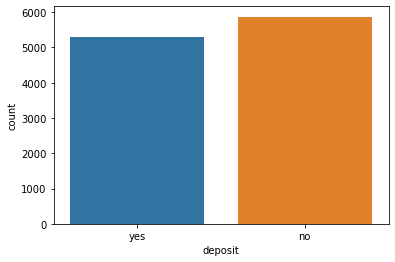

In [56]:
sns.countplot(df.deposit)

In [57]:
df.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

Observations:
    
    1.There is not much significance difference between the both the classes, so there wont be any significance class imbalance.

In [58]:
#label encoding
le.fit(df.deposit)
label_deposit=dict(zip(range(len(le.classes_)),le.classes_))
time.sleep(2)
df.deposit=le.fit_transform(df.deposit)

# Conclusions from the Univariate analysis


    
       1.Most of the columns are of categorical type
       2.There are outliers in the continously varying columns
       3.There are no null value or special values seen in the data

# Multivariate Analysis

In [59]:
from heatmap import corrplot

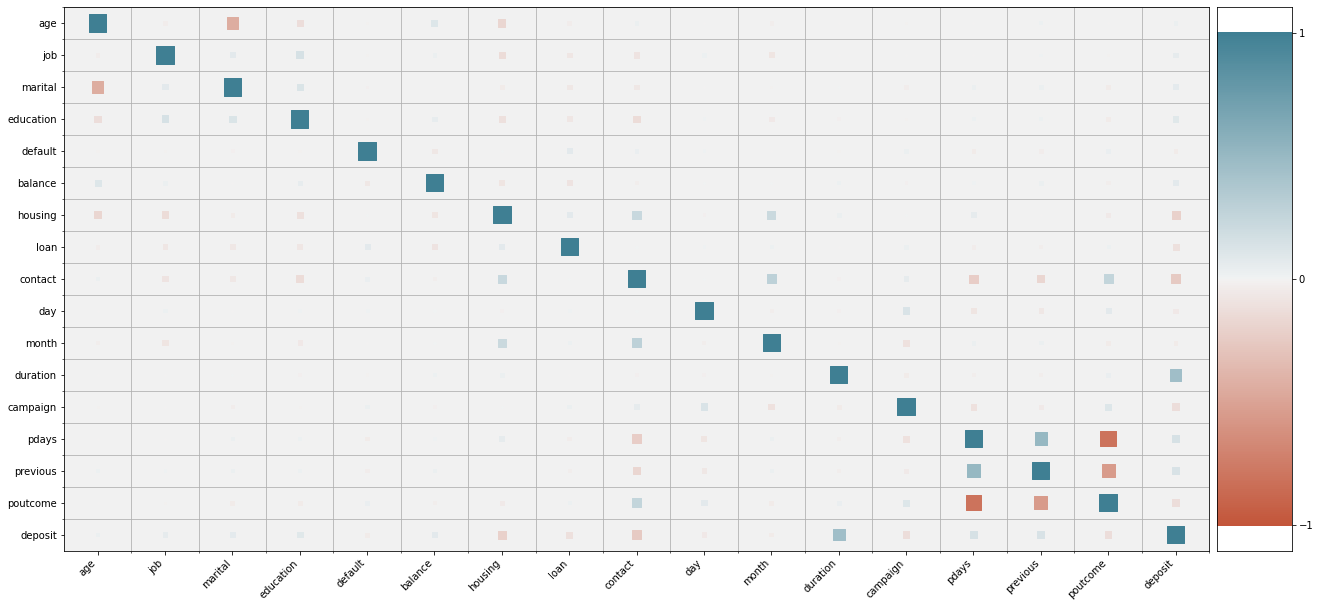

In [60]:
plt.figure(figsize=(22,10))
corrplot(df.corr(),size_scale=300)
plt.show()

Observations:
    
    There are independent variables which vary significantly with the response variable
        1.deposit vs duration
        2.contact
        3.housing
    There are independent variable which vary significantly with each other
        1.pdays vs poutcome
        2.previous vs poutcome
        3.prevoius vs pdays
        4.marital vs age

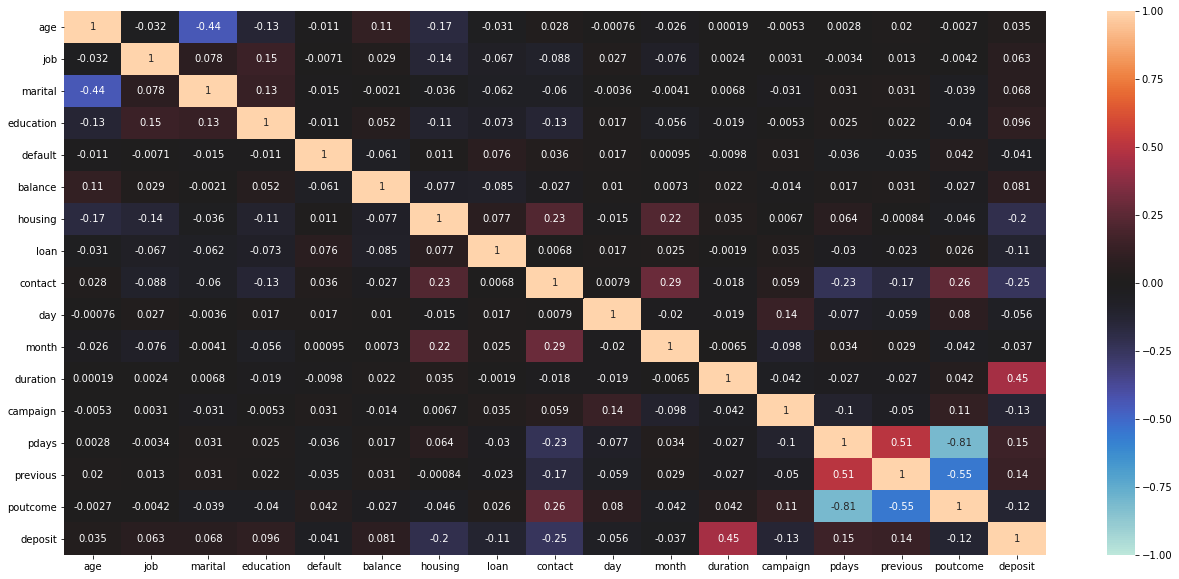

In [61]:
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0)
plt.show()

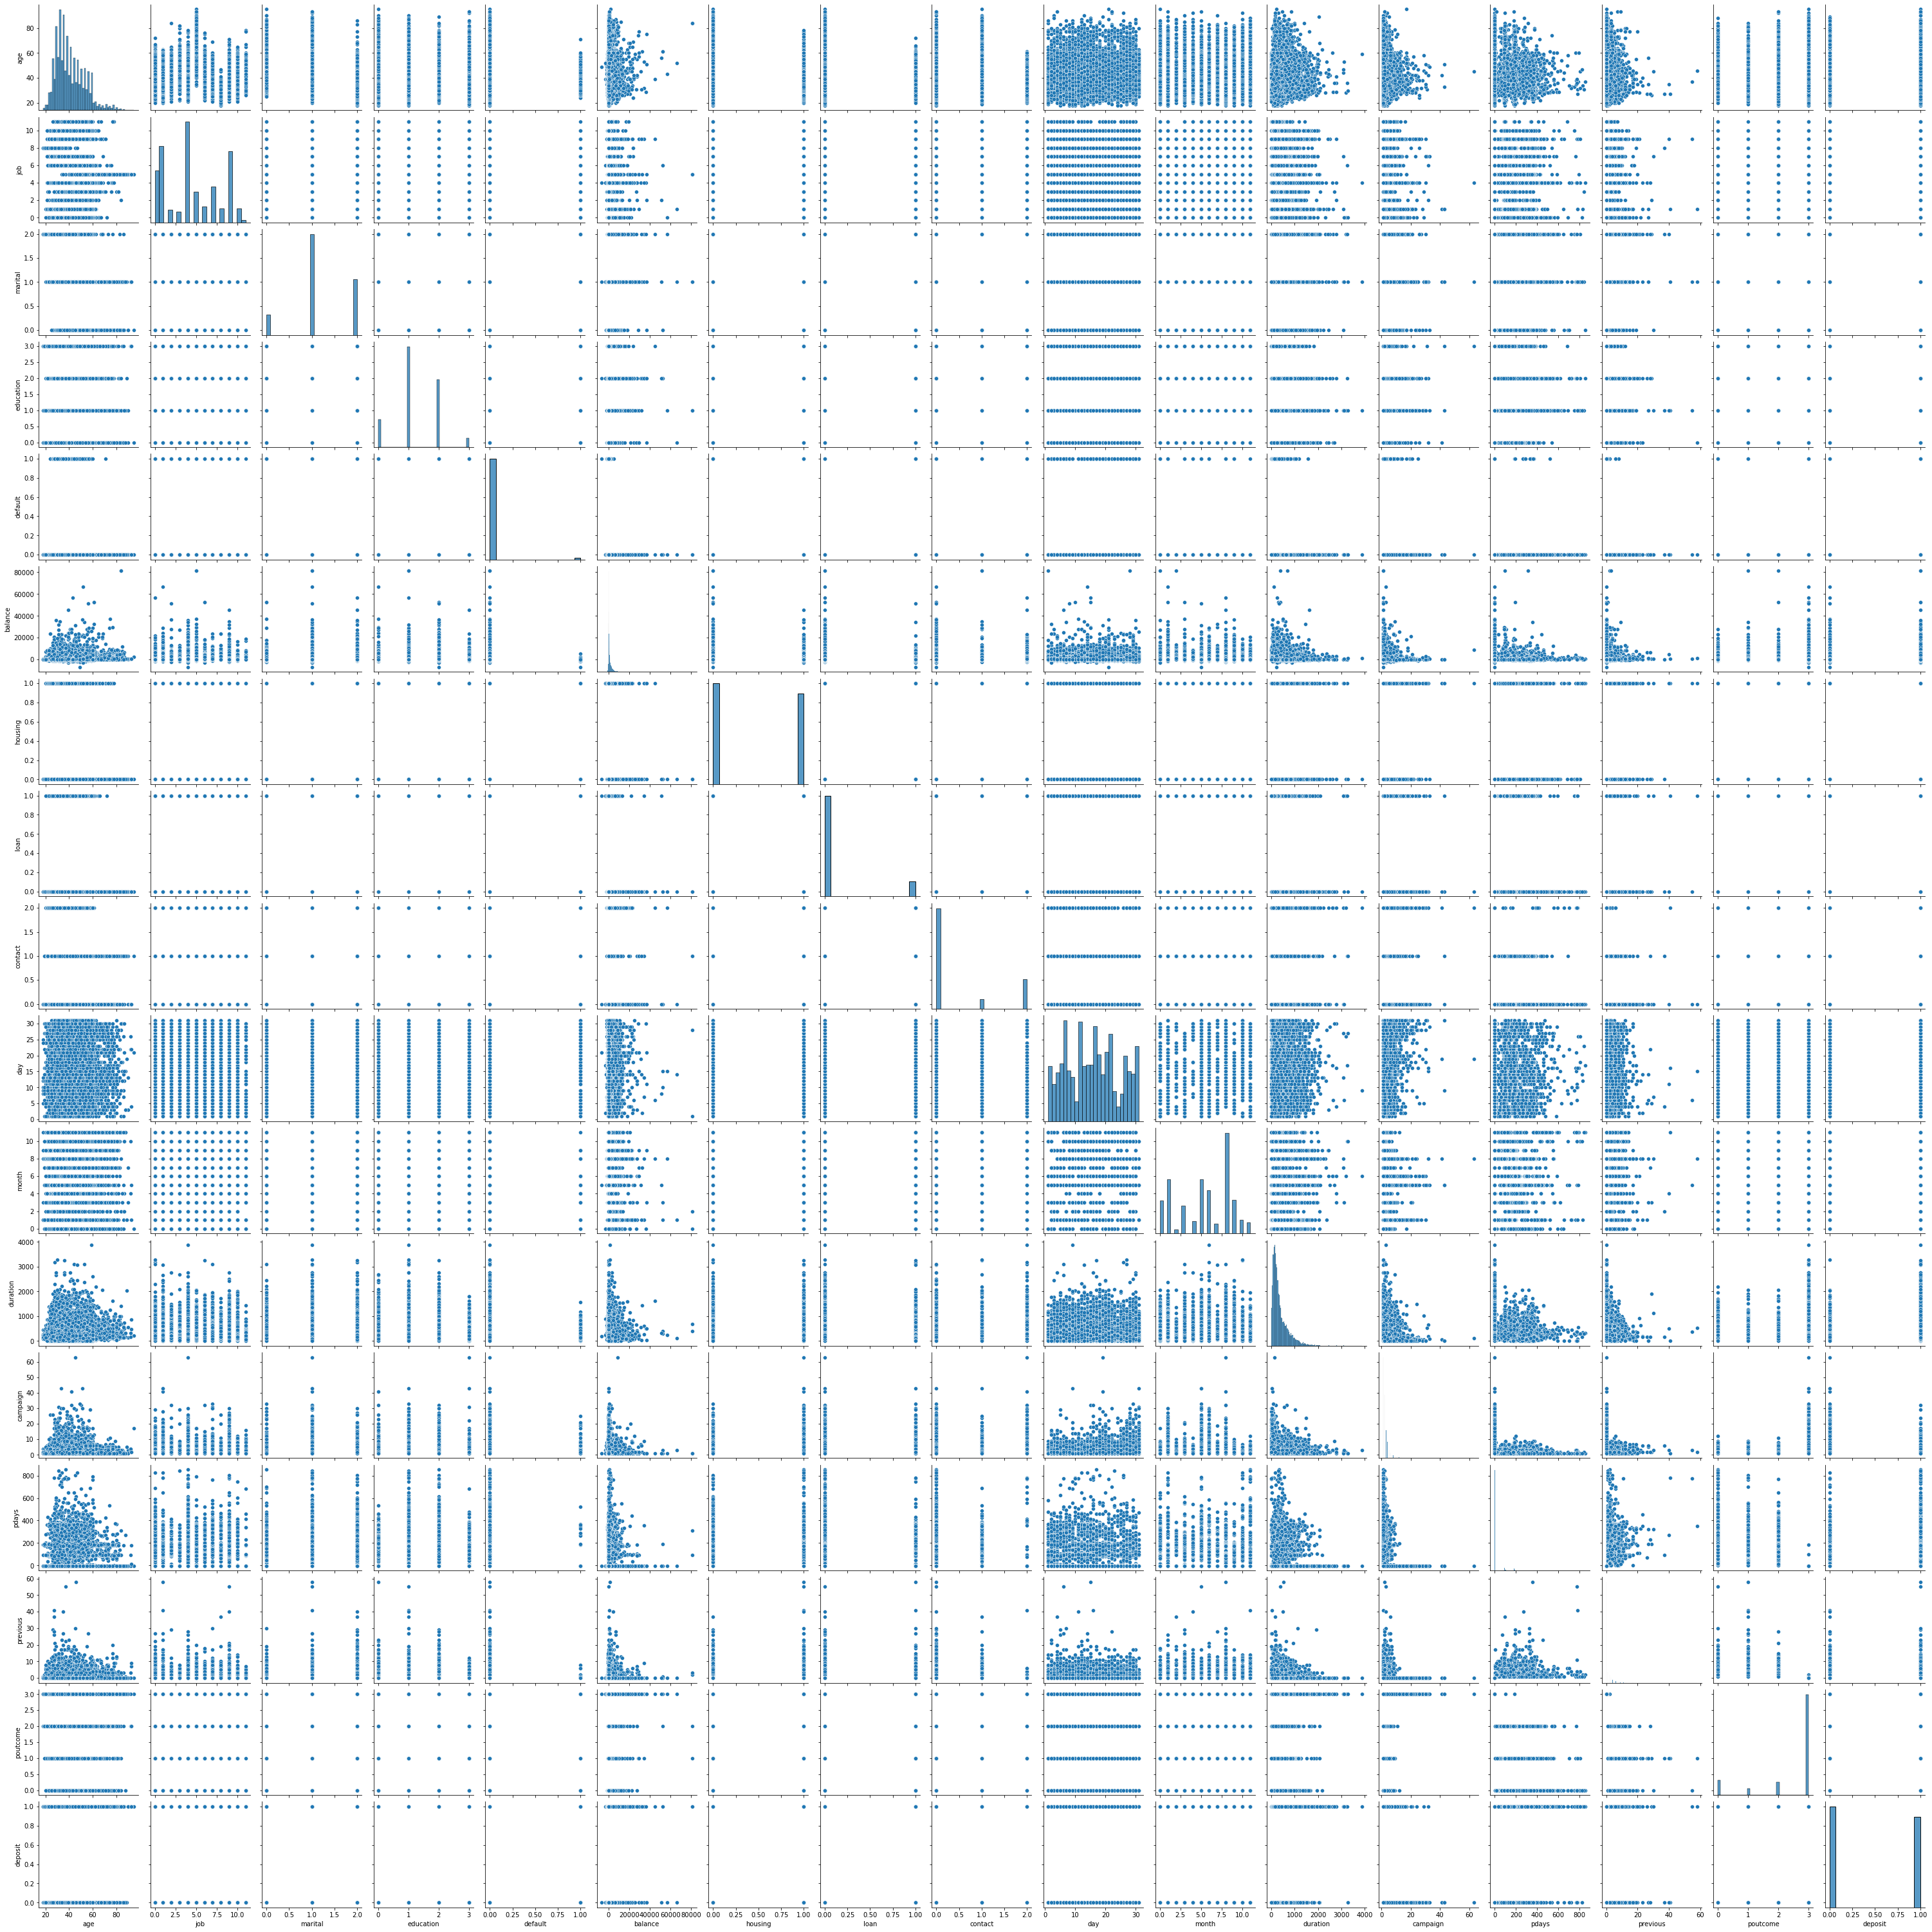

In [62]:
sns.pairplot(df)

# Bi variate Analysis

    
    
    Lets analyse those independent variables which have an significant correlation with the response variable as we defined earlier.

**1.deposit vs duration**

In [1]:
import chart_studio.plotly as py
import seaborn as sns
import plotly.express as px
import cufflinks as cf
import plotly.graph_objects as go
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode,plot
init_notebook_mode(connected=True)
cf.go_offline()

In [63]:
px.scatter(df,x='duration',y='deposit',hover_data=['deposit'])

Observations:
    
    1.We can see that upto a duration of 2050 seconds there can be two possibilities either yes or no but even the duration is after 2050 the client wont gonna reject the deposit, they will say yes to it.

**2.Contact vs deposit**

In [64]:
df.contact.value_counts()

0    8042
2    2346
1     774
Name: contact, dtype: int64

In [65]:
for i in range(3):
    print(i,'-',label_contact[i])

0 - cellular
1 - telephone
2 - unknown


In [66]:
#lets take up the cellular category and analysis.
df.loc[(df.contact==0)].count()  # fetching the number of data points which belongs to category contact category 0

age          8042
job          8042
marital      8042
education    8042
default      8042
balance      8042
housing      8042
loan         8042
contact      8042
day          8042
month        8042
duration     8042
campaign     8042
pdays        8042
previous     8042
poutcome     8042
deposit      8042
dtype: int64

In [67]:
df.loc[(df.contact==0) & (df.deposit==1)].count()

age          4369
job          4369
marital      4369
education    4369
default      4369
balance      4369
housing      4369
loan         4369
contact      4369
day          4369
month        4369
duration     4369
campaign     4369
pdays        4369
previous     4369
poutcome     4369
deposit      4369
dtype: int64

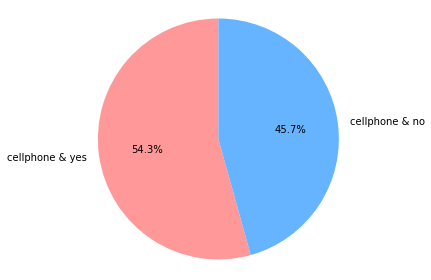

In [68]:
#Representing it through the pie chart
sizes=[4369,3673]
labels=['cellphone & yes','cellphone & no']
colors = ['#ff9999','#66b3ff']
fig1,ax1=plt.subplots()
patches,texts,autotexts=ax1.pie(sizes,colors=colors,labels=labels,autopct="%1.1f%%",startangle=90)
for text in texts:
    text.set_color('black')
for text in autotexts:
    text.set_color('black')
ax1.axis('equal')
plt.tight_layout()
plt.show()

Observations:
    
    1.We can see that through cell phone contact the probability of getting a deposition yes lies around 54.3%

In [69]:
#lets take up the telephone category.
df.loc[(df.contact==1) & (df.deposit==1)].count()

age          390
job          390
marital      390
education    390
default      390
balance      390
housing      390
loan         390
contact      390
day          390
month        390
duration     390
campaign     390
pdays        390
previous     390
poutcome     390
deposit      390
dtype: int64

Observations:
    
    1.There are 774 clients who has been contacted through telephone and out of that 390 members said yes to deposit.

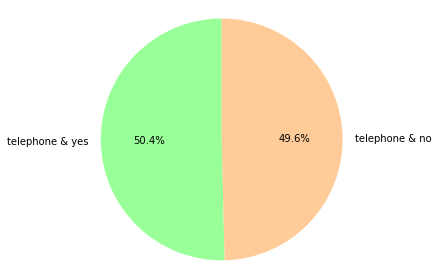

In [70]:
sizes=[390,774-390]
labels=['telephone & yes','telephone & no']
colors=['#99ff99','#ffcc99']
fig1,ax1=plt.subplots()
patches,texts,autotexts=ax1.pie(sizes,colors=colors,labels=labels,autopct='%1.1f%%',startangle=90)
for text in texts:
    text.set_color('black')
for text in autotexts:
    text.set_color('black')
ax1.axis('equal')
plt.tight_layout()
plt.show()

Observations:
    
    1.Through telephone there is equal chances either they may say yes or no.

In [71]:
#lets check the contact through unknown category.
df.loc[(df.contact==2) & (df.deposit==1)].count()

age          530
job          530
marital      530
education    530
default      530
balance      530
housing      530
loan         530
contact      530
day          530
month        530
duration     530
campaign     530
pdays        530
previous     530
poutcome     530
deposit      530
dtype: int64

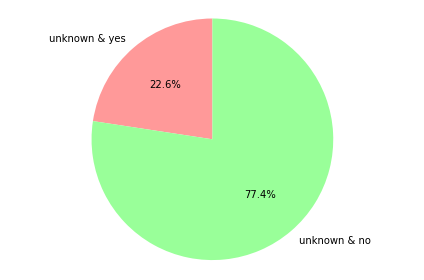

In [72]:
labels=['unknown & yes','unknown & no']
sizes=[530,1816]
colors=['#ff9999','#99ff99']
fig1,ax1=plt.subplots()
patches,texts,autotexts=ax1.pie(sizes,colors=colors,labels=labels,autopct='%1.1f%%',startangle=90)
for text in texts:
    text.set_color('black')
for text in autotexts:
    text.set_color('black')
ax1.axis('equal')
plt.tight_layout()
plt.show()

Observations:
    
    1.From the above depiction we can say that getting an deposit from unknown contact is very less comapared to other categories.

In [73]:
df.housing.value_counts()

0    5881
1    5281
Name: housing, dtype: int64

In [74]:
df.loc[(df.housing==0) & (df.deposit==1)].count()

age          3354
job          3354
marital      3354
education    3354
default      3354
balance      3354
housing      3354
loan         3354
contact      3354
day          3354
month        3354
duration     3354
campaign     3354
pdays        3354
previous     3354
poutcome     3354
deposit      3354
dtype: int64

Observations:
    
    1.From the above depiction we can see that out of 5881 who dont have housing loan 3354 clients have deposit yes.

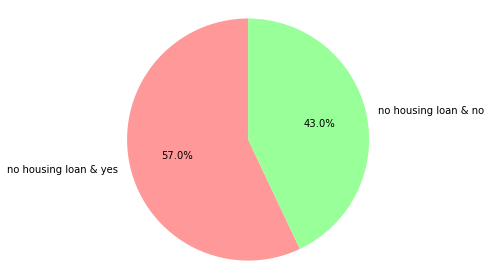

In [75]:
labels=['no housing loan & yes','no housing loan & no']
sizes=[3354,2527]
colors=['#ff9999','#99ff99']
fig1,ax1=plt.subplots()
patches,texts,autotexts=ax1.pie(sizes,colors=colors,labels=labels,autopct='%1.1f%%',startangle=90)
for text in texts:
    text.set_color('black')
for text in autotexts:
    text.set_color('black')
ax1.axis('equal')
plt.tight_layout()
plt.show()  

Observations:
    
    1.We can see that clients who dont have any housing loan are 57% likely to say yes for an deposit.

In [76]:
df.loc[(df.housing==1) & (df.deposit==1)].count() #this is about those people who has an housing loan and has deposit yes.

age          1935
job          1935
marital      1935
education    1935
default      1935
balance      1935
housing      1935
loan         1935
contact      1935
day          1935
month        1935
duration     1935
campaign     1935
pdays        1935
previous     1935
poutcome     1935
deposit      1935
dtype: int64

In [77]:
df.housing.value_counts()

0    5881
1    5281
Name: housing, dtype: int64

Observations:
    
    1.Out of 5281 clients who has got housing loan 1935 have deposit yes,3346 have deposit no.

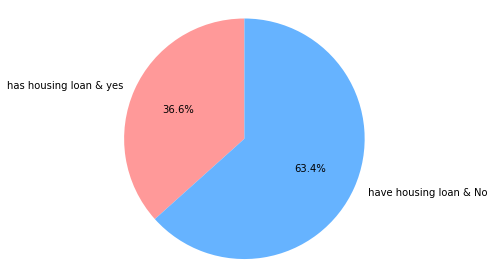

In [78]:
sizes=[1935,3346]
labels=['has housing loan & yes',' have housing loan & No']
colors=['#ff9999','#66b3ff']
fig1,ax1=plt.subplots()
patches,texts,autotexts=ax1.pie(sizes,colors=colors,labels=labels,autopct='%1.1f%%',startangle=90)
for text in texts:
    text.set_color('black')
for text in autotexts:
    text.set_color('black')
ax1.axis('equal')
plt.tight_layout()
plt.show()

Observations:
    
    1.Those clients who has got housing loan are less likey to admit for deposit compared to one without hosuing loan.
    2.Those clients who dont have housing loans are favorable to admit the deposit compared to the one with housing loan.

In [83]:
#lets make further analysis by grouping the target or response variable
df_group=df.groupby('deposit')
df_yes=df_group.get_group(1)
df_no=df_group.get_group(0)

In [85]:
df_yes.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [86]:
df_no.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
5289,57,5,2,0,0,604,0,0,0,19,9,187,1,-1,0,3,0
5290,45,0,0,1,0,0,1,0,0,17,9,102,1,-1,0,3,0
5291,48,1,1,1,0,238,1,1,0,2,6,118,2,81,1,2,0
5292,34,0,2,1,0,673,1,0,0,29,4,89,1,260,2,0,0
5293,37,2,1,2,0,7944,0,0,0,21,9,102,1,-1,0,3,0


In [87]:
df_yes.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0
mean,41.670070,4.703347,1.243902,1.360938,0.009832,1804.267915,0.365854,0.091511,0.274154,15.158253,5.320855,537.294574,2.141047,68.702968,1.170354,2.348459,1.0
std,13.497781,3.174202,0.647841,0.741310,0.098676,3501.104777,0.481714,0.288361,0.632048,8.501875,3.417620,392.525262,1.921826,118.822266,2.553272,1.021959,0.0
min,18.000000,0.000000,0.000000,0.000000,0.000000,-3058.000000,0.000000,0.000000,0.000000,1.000000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000,1.0
25%,31.000000,1.000000,1.000000,1.000000,0.000000,210.000000,0.000000,0.000000,0.000000,8.000000,2.000000,244.000000,1.000000,-1.000000,0.000000,2.000000,1.0
50%,38.000000,4.000000,1.000000,1.000000,0.000000,733.000000,0.000000,0.000000,0.000000,15.000000,6.000000,426.000000,2.000000,-1.000000,0.000000,3.000000,1.0
75%,50.000000,8.000000,2.000000,2.000000,0.000000,2159.000000,1.000000,0.000000,0.000000,22.000000,8.000000,725.000000,3.000000,98.000000,1.000000,3.000000,1.0
max,95.000000,11.000000,2.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3881.000000,32.000000,854.000000,58.000000,3.000000,1.0


In [88]:
df_no.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.00000,5873.000000,5873.0
mean,40.837391,4.293887,1.159203,1.216925,0.019751,1280.227141,0.569726,0.166184,0.683807,16.108122,5.558147,223.130257,2.839264,35.685340,0.52835,2.594245,0.0
std,10.264815,3.258419,0.602015,0.750299,0.139157,2933.411934,0.495157,0.372278,0.913663,8.322071,2.969887,208.577530,3.244474,96.182893,1.97961,0.970976,0.0
min,18.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,-1.000000,0.00000,0.000000,0.0
25%,33.000000,1.000000,1.000000,1.000000,0.000000,64.000000,0.000000,0.000000,0.000000,9.000000,3.000000,94.000000,1.000000,-1.000000,0.00000,3.000000,0.0
50%,39.000000,4.000000,1.000000,1.000000,0.000000,414.000000,1.000000,0.000000,0.000000,16.000000,6.000000,163.000000,2.000000,-1.000000,0.00000,3.000000,0.0
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1324.000000,1.000000,0.000000,2.000000,22.000000,8.000000,282.000000,3.000000,-1.000000,0.00000,3.000000,0.0
max,89.000000,11.000000,2.000000,3.000000,1.000000,66653.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3284.000000,63.000000,826.000000,41.00000,3.000000,0.0


age


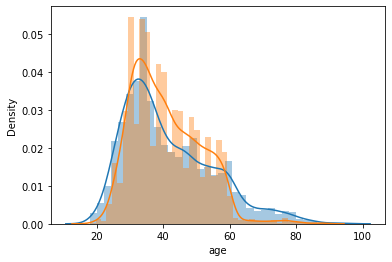



job


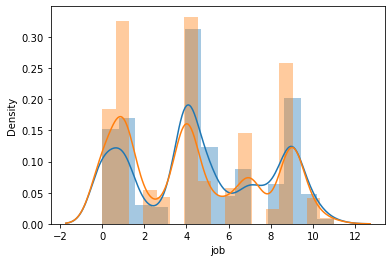



marital


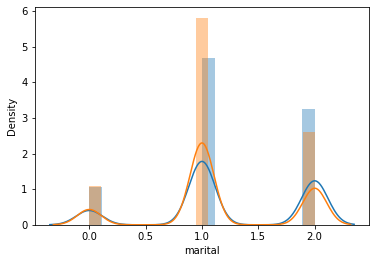



education


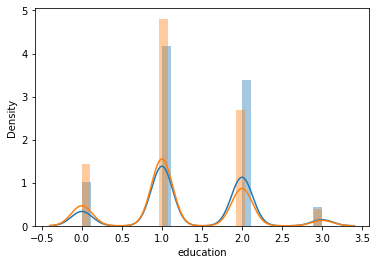



default


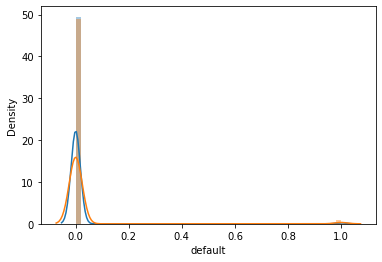



balance


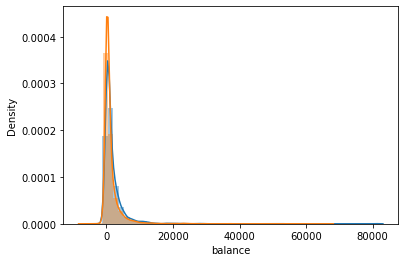



housing


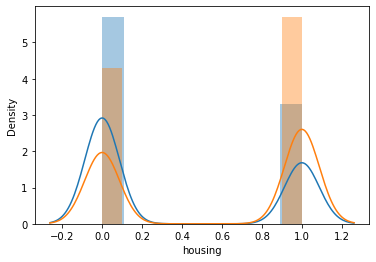



loan


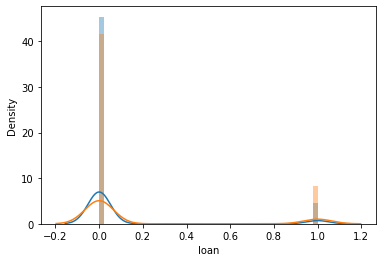



contact


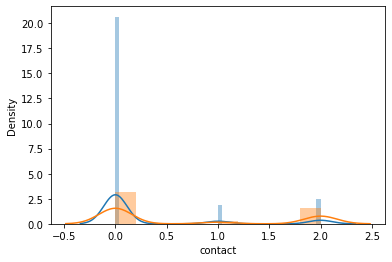



day


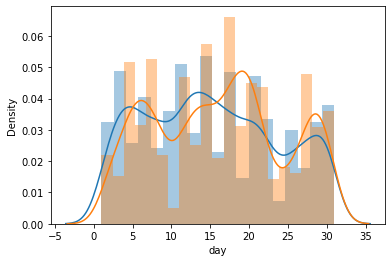



month


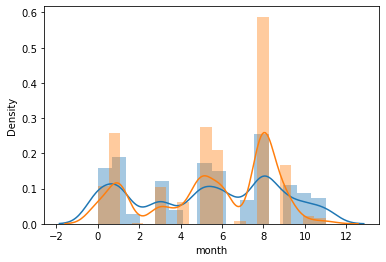



duration


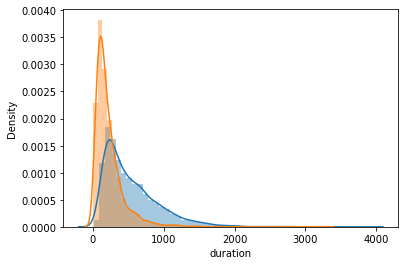



campaign


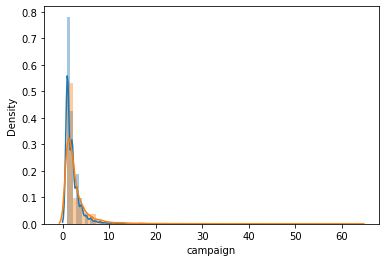



pdays


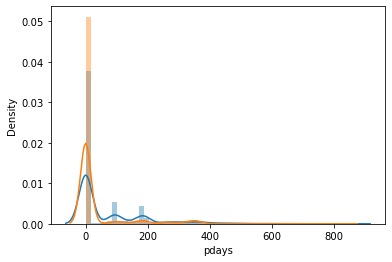



previous


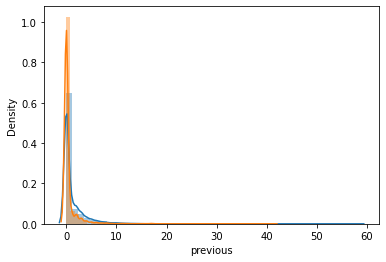



poutcome


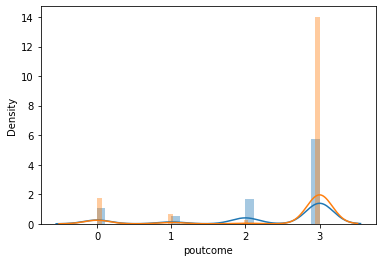



deposit


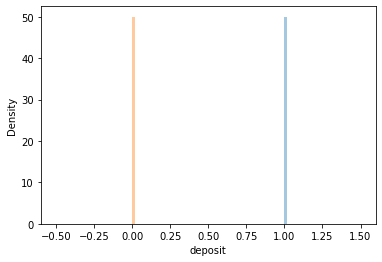

In [97]:
for i in df.columns:
    plt.plot()
    print(i)
    sns.distplot(df_yes[i])
    sns.distplot(df_no[i])
    plt.show()
    print('\n')

Observations:
    
    1.By examining the above graphs we can say that if the age of the client is more than 60 or less than 30 are more favorable to for deposition.
    2.Those client who are working in management or those who got retired are more likely to say yes for the deposition.
    3.Singles are more favorable to say yes for deposition.
    4.Those clients who have tertiary level of education are more favourable to tell yes for deposition.
    5.If you contact client in first 5 days of the month then there is a significance chance to say yes for the depotion compared to other days of the month.
    6.Most favorable months to contact clients are April,December,February,October,September

In [114]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [115]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


Observations:
    
    1.The data seems to be clean.

# Removal of outliers

# zscore method

In [116]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]
print('percentage of data loss by zscore method is :',(df.shape[0]-df1.shape[0])/df.shape[0])

percentage of data loss by zscore method is : 0.10929940870811683


Observations:
    
    1.Since the data loss is more than 7% its not advisable.

# IQR Method

In [120]:
q1=df.quantile(0.10)
q3=df.quantile(0.90)
IQR=q3-q1
df1=df[~((df <(q1-1.5*IQR))|(df >(q3+1.5*IQR))).any(axis=1)]
print('percentage of loss of data by IQR is :',(df.shape[0]-df1.shape[0])/df.shape[0])

percentage of loss of data by IQR is : 0.07749507256764021


Observations:
    
    1.In this case the data loss can be beared.

In [122]:
df1.shape

(10297, 17)

# Splitting the variable

In [140]:
x=df1.drop('deposit',axis=1)
y=df1.deposit

In [141]:
x.shape

(10297, 16)

In [142]:
y.shape

(10297,)

# Removal of skewness

In [143]:
x.skew()

age          0.853859
job          0.183428
marital     -0.174093
education    0.123632
default      0.000000
balance      2.136394
housing      0.101729
loan         2.200217
contact      1.174863
day          0.130134
month       -0.338764
duration     1.663063
campaign     2.119010
pdays        2.144873
previous     2.578869
poutcome    -1.812312
dtype: float64

Observations:
    
    Apart from the categorical columns we are going to remove skewness of all numerical column in which the skewness exceedes from -0.5 to 0.5.

    
    
    The columns age,duration,pdays,has to be treated for skewness.

In [144]:
from scipy.stats import boxcox
from scipy import stats

In [145]:
x1=x #lets make a copy and check how does removal of skewness effect the result
x1['age']=np.cbrt(x1['age'])
x1['duration']=np.cbrt(x1['duration'])
x1['pdays']=np.cbrt(x1['pdays'])
x1.skew()

age          0.409474
job          0.183428
marital     -0.174093
education    0.123632
default      0.000000
balance      2.136394
housing      0.101729
loan         2.200217
contact      1.174863
day          0.130134
month       -0.338764
duration     0.398083
campaign     2.119010
pdays        1.332482
previous     2.578869
poutcome    -1.812312
dtype: float64

In [146]:
#Accuracy before removal of skewness
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))

accuracy score through logistic regression is 
0.779
classification report is
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1596
           1       0.78      0.76      0.77      1494

    accuracy                           0.78      3090
   macro avg       0.78      0.78      0.78      3090
weighted avg       0.78      0.78      0.78      3090

confusion matrix is
[[1269  327]
 [ 355 1139]]


In [147]:
#Accuracy after removal of skewness
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.3,random_state=42)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))

accuracy score through logistic regression is 
0.779
classification report is
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1596
           1       0.78      0.76      0.77      1494

    accuracy                           0.78      3090
   macro avg       0.78      0.78      0.78      3090
weighted avg       0.78      0.78      0.78      3090

confusion matrix is
[[1269  327]
 [ 355 1139]]


Observations:
    
    1.In this scenario no need to remove skewness as there is no improvement from that.

# Using sampling techniques for class imbalance

In [148]:
#Actually there is no significance class imbalance in this scenario
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)
x_smote,y_smote=SM.fit_sample(x,y)

In [149]:
#Accuracy through x_over,y_over models
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.3,random_state=42)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.762
classification report is
              precision    recall  f1-score   support

           0       0.78      0.73      0.75      1620
           1       0.75      0.79      0.77      1648

    accuracy                           0.76      3268
   macro avg       0.76      0.76      0.76      3268
weighted avg       0.76      0.76      0.76      3268

confusion matrix is
[[1185  435]
 [ 342 1306]]




In [150]:
#Accuracy through x_smote,y_smote models
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.3,random_state=42)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.762
classification report is
              precision    recall  f1-score   support

           0       0.78      0.73      0.75      1620
           1       0.75      0.80      0.77      1648

    accuracy                           0.76      3268
   macro avg       0.76      0.76      0.76      3268
weighted avg       0.76      0.76      0.76      3268

confusion matrix is
[[1177  443]
 [ 335 1313]]




Observations:
    
    1.Both x_over,y_over and x_smote,y_smote are rejected because of poor confusion matrix.

# Applying the Standard Scaling

In [151]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [152]:
x_scaled=scale.fit_transform(x)

In [153]:
#Checking accuracy after applying the scaling
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=42)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.808
classification report is
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1596
           1       0.81      0.79      0.80      1494

    accuracy                           0.81      3090
   macro avg       0.81      0.81      0.81      3090
weighted avg       0.81      0.81      0.81      3090

confusion matrix is
[[1318  278]
 [ 314 1180]]




Observations:
    
    1.There is an improvement in accuracy score,f1 score and confusion matrix after applying thescaling techniques.

# Building the model

In [154]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
add=AdaBoostClassifier()
rf=RandomForestClassifier()

In [155]:
#Finding the best random state
#Finding the maximum accuracy
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=i)
    mod=lg
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.8155339805825242 on random state 81


In [156]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=81)

In [157]:
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.816
classification report is
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1651
           1       0.80      0.81      0.80      1439

    accuracy                           0.82      3090
   macro avg       0.81      0.82      0.81      3090
weighted avg       0.82      0.82      0.82      3090

confusion matrix is
[[1353  298]
 [ 272 1167]]




In [158]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print('accuracy score through GaussianNB is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through GaussianNB is 
0.742
classification report is
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1651
           1       0.72      0.72      0.72      1439

    accuracy                           0.74      3090
   macro avg       0.74      0.74      0.74      3090
weighted avg       0.74      0.74      0.74      3090

confusion matrix is
[[1249  402]
 [ 396 1043]]




In [162]:
from sklearn.naive_bayes import BernoulliNB

In [166]:
bnb=BernoulliNB(alpha=0.85)
bnb.fit(x_train,y_train)
pred=bnb.predict(x_test)
print('accuracy score through GaussianNB is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through GaussianNB is 
0.713
classification report is
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1651
           1       0.70      0.66      0.68      1439

    accuracy                           0.71      3090
   macro avg       0.71      0.71      0.71      3090
weighted avg       0.71      0.71      0.71      3090

confusion matrix is
[[1249  402]
 [ 484  955]]




In [167]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('accuracy score through svc is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through svc is 
0.821
classification report is
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1651
           1       0.78      0.85      0.82      1439

    accuracy                           0.82      3090
   macro avg       0.82      0.82      0.82      3090
weighted avg       0.82      0.82      0.82      3090

confusion matrix is
[[1313  338]
 [ 216 1223]]




In [168]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('accuracy score through Decisiob Tree Classifier is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through Decisiob Tree Classifier is 
0.788
classification report is
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1651
           1       0.77      0.77      0.77      1439

    accuracy                           0.79      3090
   macro avg       0.79      0.79      0.79      3090
weighted avg       0.79      0.79      0.79      3090

confusion matrix is
[[1330  321]
 [ 334 1105]]




In [169]:
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('accuracy score through knn is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through knn is 
0.778
classification report is
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1651
           1       0.77      0.75      0.76      1439

    accuracy                           0.78      3090
   macro avg       0.78      0.78      0.78      3090
weighted avg       0.78      0.78      0.78      3090

confusion matrix is
[[1326  325]
 [ 360 1079]]




In [170]:
add.fit(x_train,y_train)
pred=add.predict(x_test)
print('accuracy score through Adaboost is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through Adaboost is 
0.826
classification report is
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1651
           1       0.81      0.81      0.81      1439

    accuracy                           0.83      3090
   macro avg       0.82      0.82      0.82      3090
weighted avg       0.83      0.83      0.83      3090

confusion matrix is
[[1385  266]
 [ 273 1166]]




In [171]:
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('accuracy score through random forest is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through random forest is 
0.849
classification report is
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1651
           1       0.81      0.88      0.84      1439

    accuracy                           0.85      3090
   macro avg       0.85      0.85      0.85      3090
weighted avg       0.85      0.85      0.85      3090

confusion matrix is
[[1358  293]
 [ 175 1264]]




# Cross validation score

In [173]:
models=[lg,gnb,bnb,svc,dtc,knn,add,rf]
for m in models:
    score=cross_val_score(m,x_scaled,y,cv=5)
    print(m,'score is:')
    print(round((score.mean()),3))
    print('\n')

LogisticRegression() score is:
0.777


GaussianNB() score is:
0.722


BernoulliNB(alpha=0.85) score is:
0.682


SVC() score is:
0.784


DecisionTreeClassifier() score is:
0.739


KNeighborsClassifier() score is:
0.74


AdaBoostClassifier() score is:
0.78


RandomForestClassifier() score is:
0.809




Observations:
    
    If we observe the difference between the cross val score and accuracy then gaussianNB is th best model, but it has got poor confusion matrix so i am choosing Random forest

# Hyper parameter tuning

In [174]:
grid_param={
    'n_estimators':[10,50,100],
    'criterion':['gini','entropy'],
    'max_features':['auto','sqrt','log2'],
    'bootstrap':[True,False],
    'oob_score':[True,False],
    'class_weight':['balanced_subsample','balanced']
    
}

gd_sr=GridSearchCV(estimator=rf,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(x_scaled,y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100, 'oob_score': False}
0.8088852633713227


In [175]:
rf1=RandomForestClassifier(n_estimators=100,criterion='entropy',max_features='sqrt',bootstrap=True,oob_score=False,class_weight='balanced')
rf1.fit(x_train,y_train)
pred=rf1.predict(x_test)
print('accuracy score through random forest is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through random forest is 
0.848
classification report is
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1651
           1       0.81      0.87      0.84      1439

    accuracy                           0.85      3090
   macro avg       0.85      0.85      0.85      3090
weighted avg       0.85      0.85      0.85      3090

confusion matrix is
[[1365  286]
 [ 185 1254]]




Observations:

1.The maximum accuracy we got with least overfitting, with high f1 score is 0.848

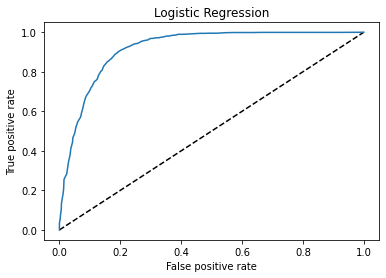

0.8491050762504583

In [179]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=rf1.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()
auc_score=roc_auc_score(y_test,rf1.predict(x_test))
auc_score

Observations:

1.The auc_roc score for this particular model is 0.849, suggesting that model is going to perform better.

# Saving the model

In [180]:
import joblib
joblib.dump(rf1,'bankmarketing.obj')

['bankmarketing.obj']